In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('data/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [9]:
df.shape

(1460, 289)

In [8]:
df = pd.get_dummies(df, dtype='int')

In [10]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [11]:
df = df.fillna(df.mean())

In [12]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [13]:
df_corr = df.corr()
df_corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295


In [14]:
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

In [15]:
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [16]:
df_corr_sort.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,...,-0.027475,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
GrLivArea,0.008273,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,...,-0.022348,0.168368,-0.036522,-0.121102,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239
GarageCars,0.016570,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,...,-0.044502,0.286290,-0.087089,-0.197458,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164
GarageArea,0.017634,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,...,-0.041904,0.296671,-0.080601,-0.218665,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
TotalBsmtSF,-0.015415,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,...,-0.039543,0.265644,0.003646,-0.212851,-0.032031,-0.055895,-0.047002,0.019569,-0.160222,0.266268
1stFlrSF,0.010496,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.445863,...,-0.043721,0.221219,-0.008215,-0.198056,-0.030196,-0.037451,0.068107,0.021949,-0.158772,0.221037
FullBath,0.005587,0.131608,0.180424,0.126031,0.550600,-0.194149,0.468271,0.439046,0.275730,0.058543,...,-0.017570,0.238471,-0.019094,-0.161352,-0.093473,-0.006193,0.016794,-0.003225,-0.110040,0.232767
BsmtQual_Ex,-0.048586,-0.055495,0.210258,0.065639,0.470780,-0.151008,0.319394,0.286165,0.333908,0.271434,...,-0.017622,0.385042,-0.013641,-0.286102,-0.052580,-0.015756,-0.027366,-0.035427,-0.221979,0.378613
TotRmsAbvGrd,0.027239,0.040380,0.320146,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280027,0.044316,...,-0.033113,0.147496,-0.014461,-0.113335,-0.050332,-0.008639,0.059698,0.031347,-0.092644,0.142032


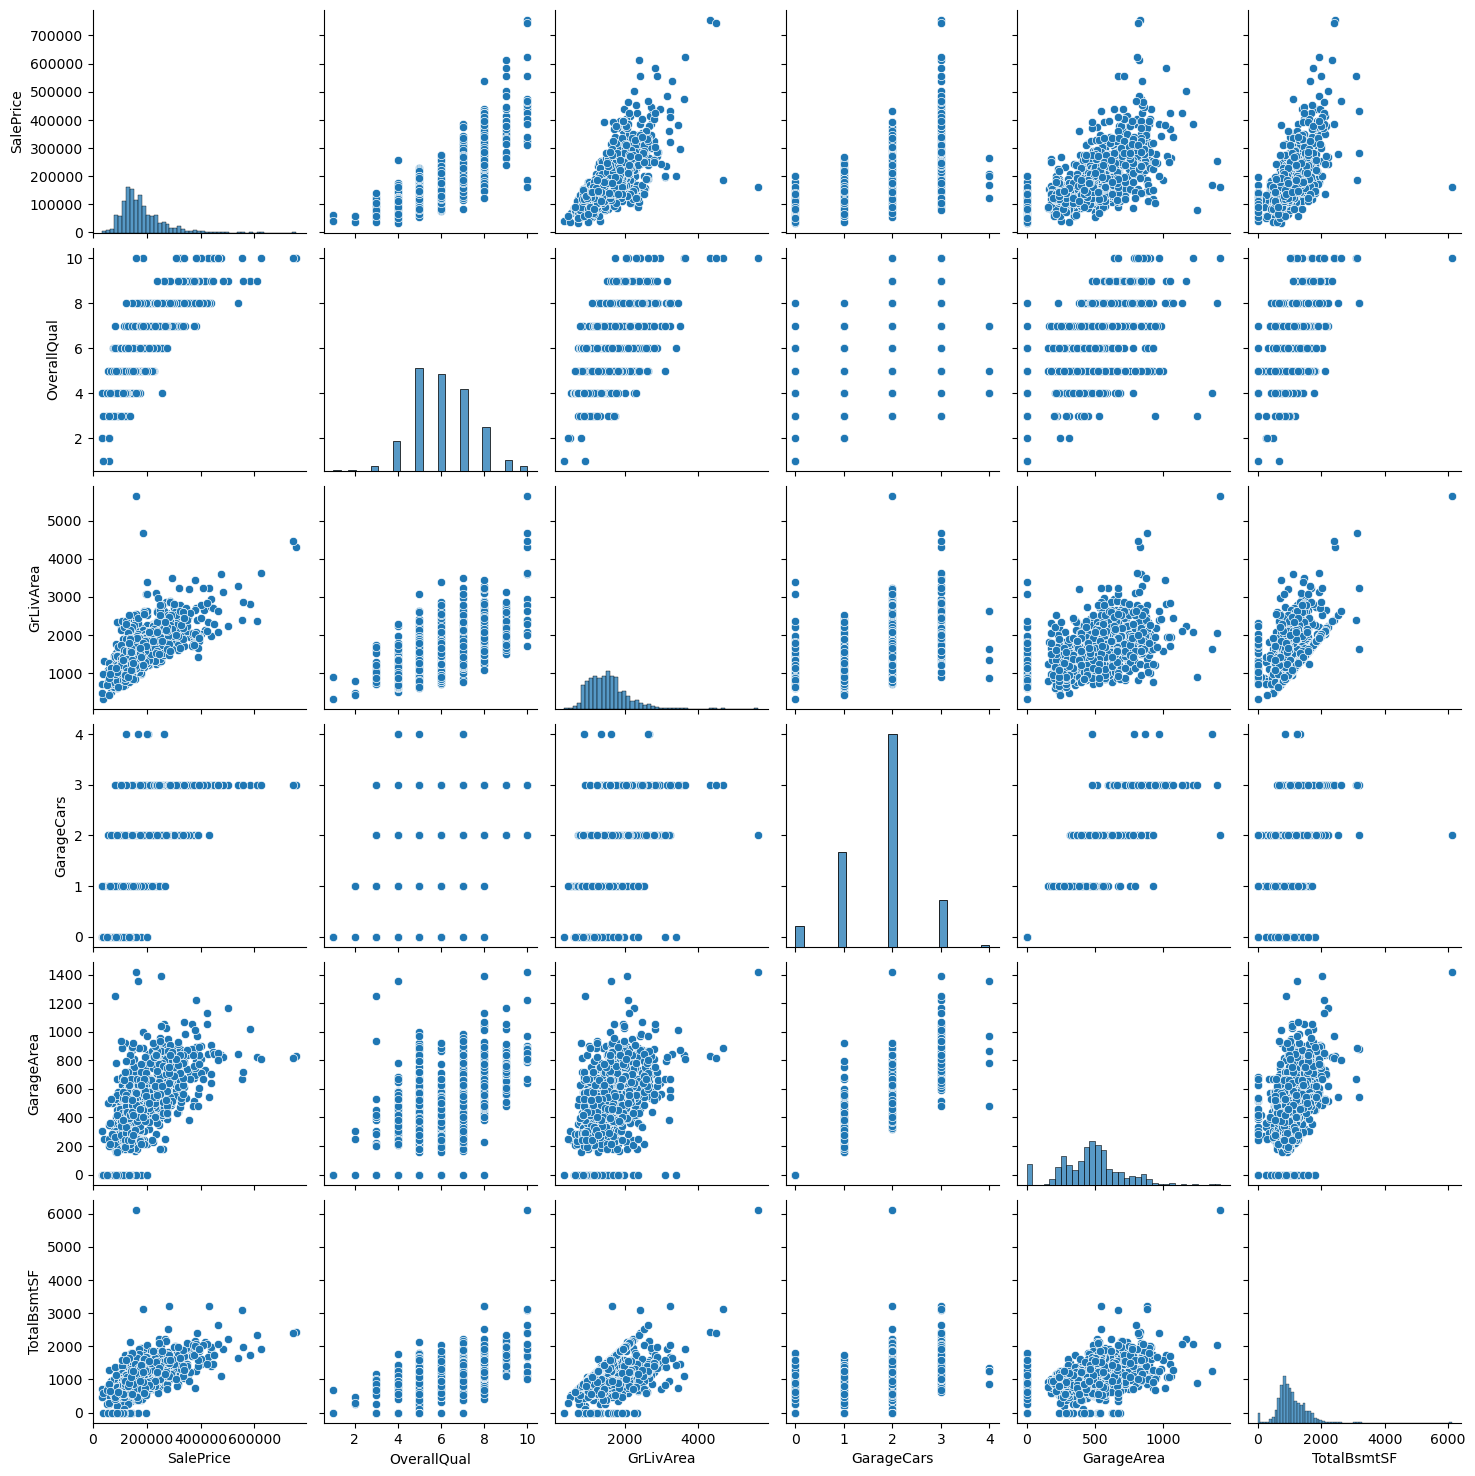

In [18]:
cols = ['SalePrice', 'OverallQual','GrLivArea','GarageCars', 'GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])
plt.show()

In [19]:
cols_train = ['OverallQual','GrLivArea','GarageCars', 'GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [21]:
model = keras.Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='mean_squared_error', optimizer='adam') #회귀 문제이기 때문에 metrics는 들어가지 않음
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
modelpath = 'model/ch15_house.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [23]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.25, callbacks=[early_stopping,checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 12ms/step - loss: 38856617984.0000 - val_loss: 40613920768.0000
Epoch 2/2000
28/28 [==============================] - 0s 4ms/step - loss: 38622408704.0000 - val_loss: 40257728512.0000
Epoch 3/2000
28/28 [==============================] - 0s 4ms/step - loss: 38075506688.0000 - val_loss: 39307878400.0000
Epoch 4/2000
28/28 [==============================] - 0s 4ms/step - loss: 36515491840.0000 - val_loss: 36611911680.0000
Epoch 5/2000
28/28 [==============================] - 0s 4ms/step - loss: 32377067520.0000 - val_loss: 29924855808.0000
Epoch 6/2000
28/28 [==============================] - 0s 4ms/step - loss: 23507802112.0000 - val_loss: 17916878848.0000
Epoch 7/2000
28/28 [==============================] - 0s 4ms/step - loss: 11293892608.0000 - val_loss: 5799501824.0000
Epoch 8/2000
28/28 [==============================] - 0s 4ms/step - loss: 3246477568.0000 - val_loss: 2053726336.0000
Epoch 9/2000
28/28 [======================

In [24]:
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다. 
n_iter = 0
Y_prediction = model.predict(X_test).flatten() #일차형 배열로 변경
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 1ms/step
실제가격: 207500.00, 예상가격: 234334.73
실제가격: 135960.00, 예상가격: 152036.86
실제가격: 187750.00, 예상가격: 188900.28
실제가격: 130000.00, 예상가격: 165896.38
실제가격: 230000.00, 예상가격: 195035.42
실제가격: 99900.00, 예상가격: 95043.59
실제가격: 75000.00, 예상가격: 116532.18
실제가격: 201000.00, 예상가격: 210674.88
실제가격: 149900.00, 예상가격: 203374.05
실제가격: 139950.00, 예상가격: 162437.58
실제가격: 37900.00, 예상가격: 88294.70
실제가격: 185000.00, 예상가격: 191116.44
실제가격: 290000.00, 예상가격: 271109.31
실제가격: 153900.00, 예상가격: 187455.48
실제가격: 256300.00, 예상가격: 246127.05
실제가격: 136905.00, 예상가격: 226742.77
실제가격: 113000.00, 예상가격: 135069.45
실제가격: 385000.00, 예상가격: 274710.09
실제가격: 119500.00, 예상가격: 131837.83
실제가격: 222000.00, 예상가격: 201171.25
실제가격: 217000.00, 예상가격: 209759.62
실제가격: 200000.00, 예상가격: 277568.81
실제가격: 197000.00, 예상가격: 181824.25
실제가격: 106500.00, 예상가격: 130692.34
실제가격: 475000.00, 예상가격: 343097.81


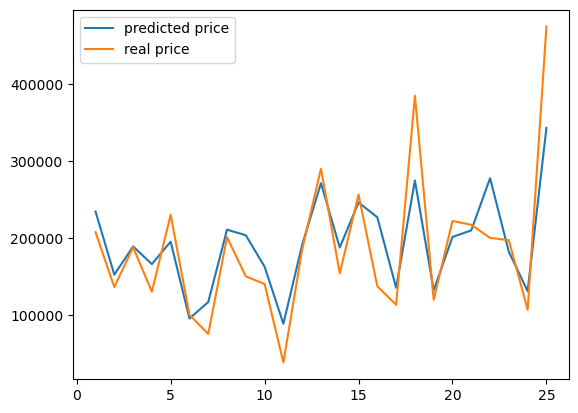

In [25]:
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()